edge_outsize_community_bar


In [3]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from data import pt1,pt2 #数据存在data.py里
import matplotlib.patches as patches
from PIL import Image

In [32]:
pt = pt1+pt2
data0 = [[i[1],i[2]+i[1]-1,i[5],i[4]] for i in pt if i[5]<=50000]
res = np.zeros((50000,2000))
sales = np.zeros((50000,2000))
for i in data0:
    res[i[2]][i[1]] += 1
    sales[i[2]][i[1]] += i[3]
for i in range(sales.shape[0]):
    for j in range(sales.shape[1]):
        if res[i][j]!=0: 
            sales[i][j] = sales[i][j]/res[i][j]

In [40]:
data = sales
data = data + 0.1
max_sale = np.max(data[:200, :200])
data[data>3000]=0
data = data[:800,:200]

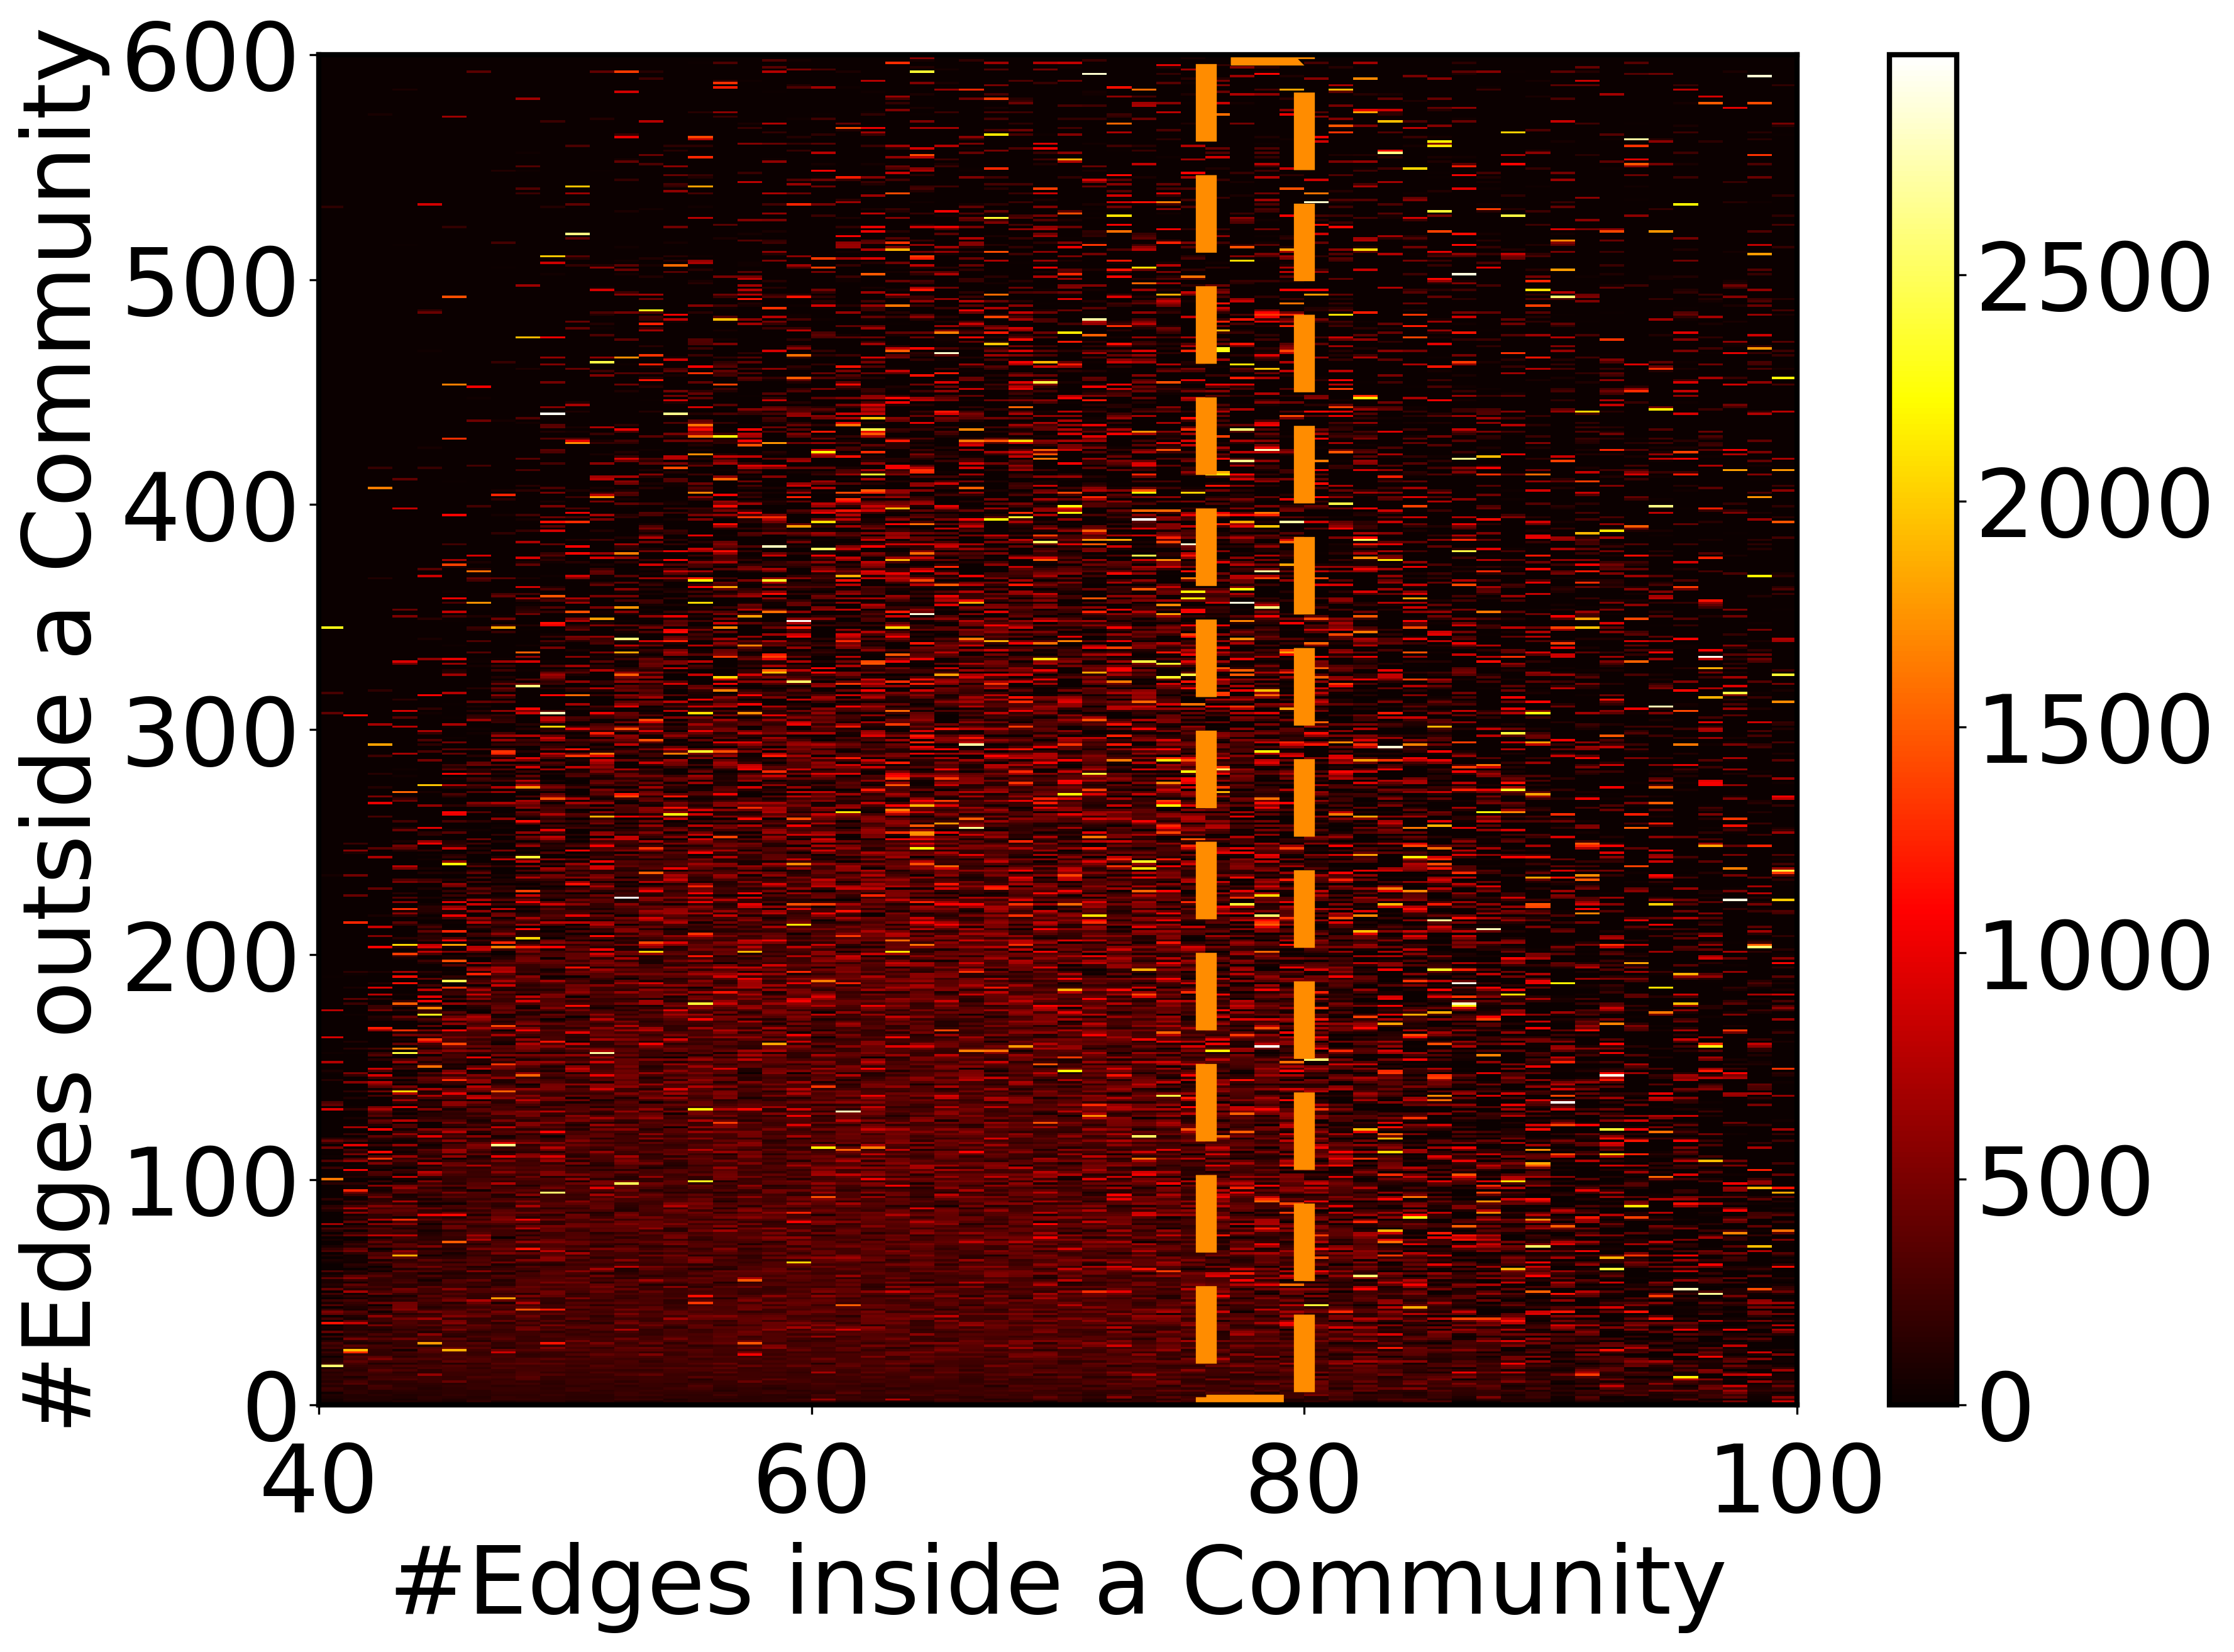

In [137]:
# 调整x，y轴的label距离坐标轴的距离
mpl.rcParams['xtick.major.pad'] = 10
# 调整字体为type 1 font
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# 作图尺寸
f, ax = plt.subplots(1,1,dpi=300,figsize=(12,9))
#plt.figure(figsize=(12,9))
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
# 调整坐标轴边框的粗细
plt.rcParams['axes.linewidth'] = 2

plt.pcolor(data,cmap=plt.cm.hot,norm=mpl.colors.Normalize(vmin=np.min(data),vmax=np.max(data)))

cbar = plt.colorbar()
cbar.ax.tick_params(labelsize = 36)

ax=plt.gca()
ax.set_xlim(40,100)
ax.set_ylim(0,600)
ax.set_xlabel(r'#Edges inside a Community',fontsize=36)
ax.set_ylabel(r'#Edges outside a Community',fontsize=36)
ax.tick_params(labelsize=36)
plt.tight_layout()
#plt.show()

# Create a Rectangle patch
rect = patches.Rectangle((76,0),4,600,linewidth=8,edgecolor=r'darkorange',facecolor='none',linestyle="--")

# Add the patch to the Axes
ax.add_patch(rect)
plt.savefig("/Users/yuanyuan/Documents/workplace/Community-Value-Prediction-Baseline/figure/heatmap.eps")
plt.show()


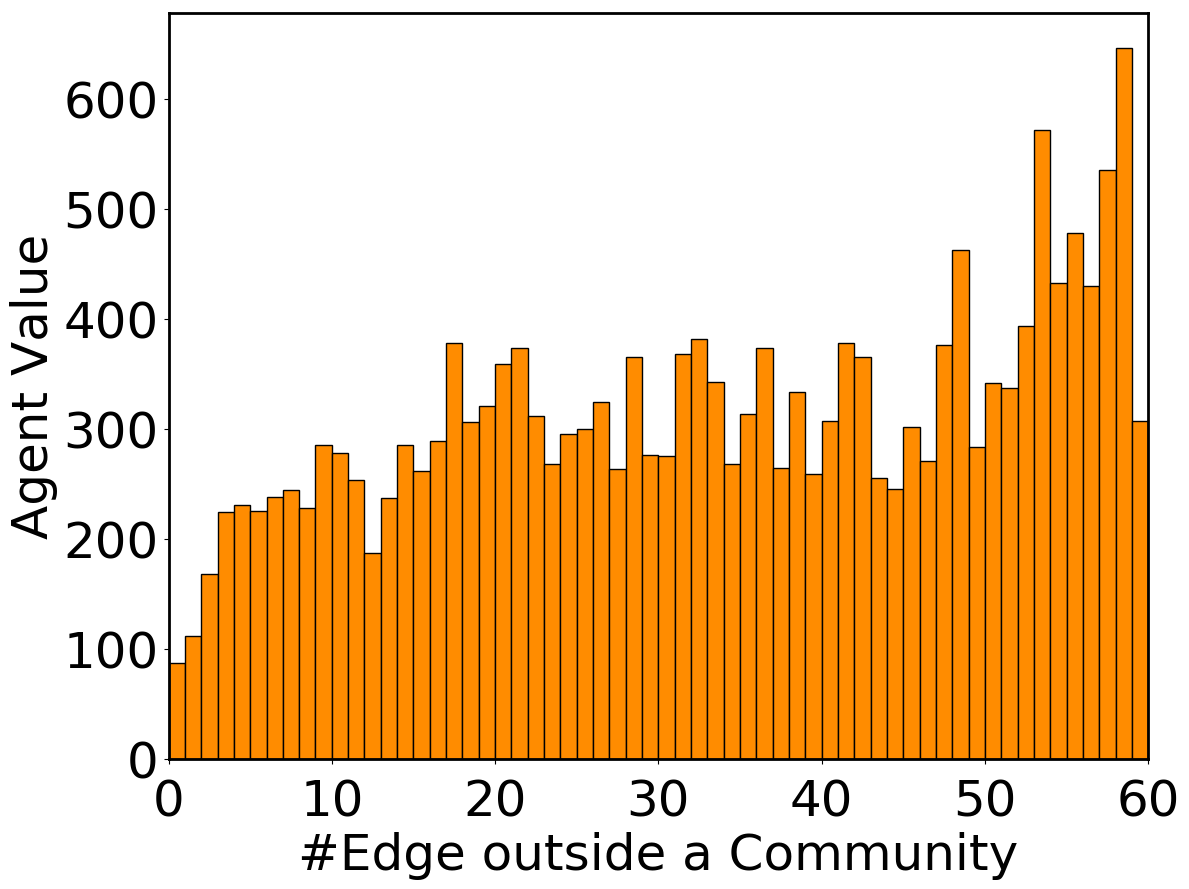

In [138]:
# 60,61,62,63,64
# 74 75 76 
# 76 77
l = 60
mmin = 76
mmax = 79
chu = 2
d = sales[:l,mmin:mmax]
bar = np.zeros(l)
for i in range(d.shape[0]):
    bar[i] = np.mean(d[i])
for i in range(d.shape[0]):
    if i==0:
        bar[0] = 0.8*bar[0]+0.2*bar[1]
    elif i==d.shape[0]-1:
        bar[i] = 0.8*bar[i]+0.2*bar[i-1]
    else:
        bar[i] = 0.6*bar[i]+0.2*bar[i-1]+0.2*bar[i+1]

x = np.arange(0,l)+0.5

truncated = 30
ceil = 10000
# 调整x，y轴的label距离坐标轴的距离
mpl.rcParams['xtick.major.pad'] = 10
# 调整字体为type 1 font
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
# 作图尺寸
plt.figure(figsize=(12,9))
# 默认的像素：[6.0,4.0]，分辨率为100，图片尺寸为 600&400
plt.rcParams['savefig.dpi'] = 100 #图片像素
plt.rcParams['figure.dpi'] = 100 #分辨率
# 调整坐标轴边框的粗细
plt.rcParams['axes.linewidth'] = 2

plt.bar(x, bar, edgecolor=['black']*truncated, color=r'darkorange', linewidth=1,width=1, label=r'cdf')
ax=plt.gca()
ax.set_xlabel(r'#Edge outside a Community',fontsize=36)
ax.set_ylabel(r'Agent Value',fontsize=36)
# 调整坐标轴取值范围
ax.set_xlim(0,60)
# 坐标轴的坐标文字大小
ax.tick_params(labelsize=36)
plt.tight_layout()
plt.savefig("/Users/yuanyuan/Documents/workplace/Community-Value-Prediction-Baseline/figure/outsideedge_bar.eps")
plt.show()